In [1]:
# Mustafa Kemal AYDIN
# 200905023

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Veri Analizi ve Temizlenmesi

In [2]:
# Name stünu silindi ve ilk 10 veri gösterildi
df = pd.read_csv("backup.csv")
df = df.drop(labels="Name",axis=1)
df['Year'] = pd.DatetimeIndex(df['Launched']).year
df.head(10)

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
0,1860890148,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009
1,709707365,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009
2,1703704063,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009
3,727286,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009
4,1622952265,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009
5,2089078683,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,2009
6,830477146,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed,2009
7,266044220,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful,2009
8,1502297238,Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled,2009
9,813230527,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed,2009


In [3]:
# Boş veriler gösterildi
df.isnull().sum()

ID             0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
Year           0
dtype: int64

In [4]:
# Veriler değerlendirildi
df.describe()

,ID,Goal,Pledged,Backers,Year
count,9.990000e+02,9.990000e+02,999.000000,999.000000,999.0
mean,1.074048e+09,7.203069e+03,2040.285285,32.467467,2009.0
std,6.065608e+08,3.676912e+04,4437.591249,69.866411,0.0
min,6.378670e+05,1.000000e+00,0.000000,0.000000,2009.0
25%,5.669267e+08,1.500000e+03,41.000000,2.000000,2009.0
50%,1.070416e+09,3.000000e+03,525.000000,10.000000,2009.0
75%,1.612793e+09,5.500000e+03,2252.000000,38.000000,2009.0
max,2.147220e+09,1.065000e+06,84614.000000,1312.000000,2009.0


In [5]:
# Sayısal veriler kategorilere ayrıldı
categorical_df = df.iloc[:,1:4]
numerical_df = df.iloc[:,6:9]
numerical_df

,Goal,Pledged,Backers
0,1000,625,30
1,80000,22,3
2,20,35,3
3,99,145,25
4,1900,387,10
...,...,...,...
994,2000,865,13
995,5000,5075,89
996,11000,2075,6
997,2000,1004,24


Verilerin başarılı proje ve başarısız proje olarak değerlendirilmesi

In [6]:
# Başarılı projeler yıllara göre ait oldukları ülkeler
df_successfull=df[df["State"] == "Successful"]
df_successfull["Country"].value_counts()

print("Total successful attempts : ",end=" ")
print(df_successfull["Country"].value_counts().sum())

print("Total number of successful attempts by type : ")
print(df_successfull["Country"].value_counts())

Total successful attempts :  419
Total number of successful attempts by type : 
Country
United States    419
Name: count, dtype: int64


In [7]:
# Başarılı projeler yıllara göre kategorileri
df_successfull=df[df["State"] == "Successful"]
df_successfull["Category"].value_counts()

print("Total successful attempts : ",end=" ")
print(df_successfull["Category"].value_counts().sum())

print("Total number of successful attempts by type : ")
print(df_successfull["Category"].value_counts())

Total successful attempts :  419
Total number of successful attempts by type : 
Category
Music           109
Film & Video     86
Art              59
Publishing       40
Photography      27
Theater          18
Games            17
Journalism       15
Technology       13
Food             12
Comics            9
Fashion           4
Design            4
Crafts            4
Dance             2
Name: count, dtype: int64


In [8]:
# Başarısız projelerin yıllara göre ait oldukları ülekeler
df_failed=df[df["State"] == "Failed"]
df_failed["Country"].value_counts()

print("Total failed attempts : ",end=" ")
print(df_failed["Country"].value_counts().sum())

print("Total number of failed attempts by type : ")
print(df_failed["Country"].value_counts())

Total failed attempts :  460
Total number of failed attempts by type : 
Country
United States    460
Name: count, dtype: int64


In [9]:
# Başarısız projelerin yıllara göre kategorileri
df_failed=df[df["State"] == "Failed"]
df_failed["Category"].value_counts()

print("Total failed attempts : ",end=" ")
print(df_failed["Category"].value_counts().sum())

print("Total number of failed attempts by type : ")
print(df_failed["Category"].value_counts())

Total failed attempts :  460
Total number of failed attempts by type : 
Category
Film & Video    121
Music            87
Art              60
Publishing       44
Photography      24
Technology       23
Fashion          18
Theater          18
Design           15
Games            14
Journalism       14
Comics            7
Food              7
Crafts            5
Dance             3
Name: count, dtype: int64


Aykırı Verilerin Bulunması

In [10]:
hero_df = df_successfull[df_successfull["Goal"] > df_successfull["Pledged"]]
hero_df

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year


2 proje girişimi yeterli destek görememesine rağmen başarılı olmuş.

Sınıflandırma Modelini Modeli oluşturma

Başarılı ve Başarısız proje verilerinin birleştirilmesi

In [11]:
# Başarısız projeler
df_failed=df[df["State"] == "Failed"]
df_failed.head()

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
0,1860890148,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009
1,709707365,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009
4,1622952265,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009
6,830477146,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed,2009
9,813230527,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed,2009


In [12]:
# Başarılı projeler
df_successfull=df[df["State"] == "Successful"]
df_successfull.head()

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
2,1703704063,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009
3,727286,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009
5,2089078683,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,2009
7,266044220,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful,2009
10,469734648,Photography,Photography,United States,2009-04-29 06:43:44,2009-06-17,350,1630,31,Successful,2009


In [13]:
df2 = pd.concat([df_successfull,df_failed],axis=0)
df2.drop(columns=["ID","Launched","Deadline"],inplace=True)
df2.reset_index(inplace=True)

Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["State"] = le.fit_transform(df2["State"])

In [15]:
X = df2.drop(columns = ["State"], axis=1)
y = df2["State"]

In [16]:
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [  
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler", numeric_transformer,num_features),
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 35)
X_train.shape, X_test.shape

((615, 76), (264, 76))

In [19]:
# Naive Bayes ayarlaması
Xd = X.toarray()
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd,y, test_size=0.3,random_state = 35)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# logistic classifier
logr = LogisticRegression(penalty='l2', random_state=35, solver='liblinear', max_iter=100, verbose=3, class_weight='balanced')
logr.fit(X_train,y_train)

# decision tree classifier
decr = DecisionTreeRegressor(splitter='best',min_samples_split=2, random_state=35, min_weight_fraction_leaf=0.0)
decr.fit(X_train,y_train)

# random forest classification
ranc = RandomForestClassifier(n_estimators=10, min_samples_split=2, criterion='gini', min_weight_fraction_leaf=0.0, max_features='auto')
ranc.fit(X_train,y_train)

# k nearest neighbors classification
knnc = KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='kd_tree', leaf_size=60, n_jobs=-1)
knnc.fit(X_train,y_train)

# support vector machine classification
svmc = svm.SVC(kernel='linear', gamma='auto', probability=True, max_iter=-1, random_state=35)
svmc.fit(X_train,y_train)

# naive bayes classification
gnbc = GaussianNB(var_smoothing=1e-9)
gnbc.fit(Xd_train,yd_train)

# adaboost classification
adac = AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0)
adac.fit(X_train,y_train)

# ann classification
annc = MLPClassifier(activation='relu', solver='adam', batch_size='auto')
annc.fit(X_train,y_train)


[LibLinear]iter  1 act 8.386e+01 pre 6.442e+01 delta 2.363e+00 f 4.263e+02 |g| 1.869e+02 CG   5
iter  2 act 7.804e+01 pre 5.807e+01 delta 2.363e+00 f 3.424e+02 |g| 9.463e+01 CG   4
cg reaches trust region boundary
iter  3 act 5.088e+01 pre 4.161e+01 delta 3.230e+00 f 2.644e+02 |g| 4.275e+01 CG   4
iter  4 act 1.945e+01 pre 1.740e+01 delta 3.576e+00 f 2.135e+02 |g| 1.734e+01 CG   6
iter  5 act 1.140e+00 pre 1.084e+00 delta 3.576e+00 f 1.941e+02 |g| 4.090e+00 CG   6
iter  6 act 1.921e-02 pre 1.914e-02 delta 3.576e+00 f 1.929e+02 |g| 5.156e-01 CG   6
iter  7 act 1.775e-04 pre 1.774e-04 delta 3.576e+00 f 1.929e+02 |g| 3.970e-02 CG   7


MLPClassifier()

In [21]:
prediction = logr.predict(X_test)
accuracy1 = accuracy_score(y_test,prediction)
print('Accuracy Score:', accuracy1)
print('F1 Score: %.3f' % f1_score(y_test, prediction))
print('Precision Score: %.3f' % precision_score(y_test, prediction))
print('Recall Score: %.3f' % recall_score(y_test, prediction))

Accuracy Score: 0.9053030303030303
F1 Score: 0.897
Precision Score: 0.901
Recall Score: 0.893


In [22]:
prediction = decr.predict(X_test)
accuracy2 = accuracy_score(y_test,prediction)
print('Accuracy Score:', accuracy2)
print('F1 Score: %.3f' % f1_score(y_test, prediction))
print('Precision Score: %.3f' % precision_score(y_test, prediction))
print('Recall Score: %.3f' % recall_score(y_test, prediction))

Accuracy Score: 0.9659090909090909
F1 Score: 0.964
Precision Score: 0.938
Recall Score: 0.992


In [23]:
prediction = ranc.predict(X_test)
accuracy3 = accuracy_score(y_test,prediction)
print('Accuracy Score:', accuracy3)
print('F1 Score: %.3f' % f1_score(y_test, prediction))
print('Precision Score: %.3f' % precision_score(y_test, prediction))
print('Recall Score: %.3f' % recall_score(y_test, prediction))

Accuracy Score: 0.9204545454545454
F1 Score: 0.916
Precision Score: 0.898
Recall Score: 0.934


In [24]:
prediction = knnc.predict(X_test)
accuracy4 = accuracy_score(y_test,prediction)
print('Accuracy Score:', accuracy4)
print('F1 Score: %.3f' % f1_score(y_test, prediction))
print('Precision Score: %.3f' % precision_score(y_test, prediction))
print('Recall Score: %.3f' % recall_score(y_test, prediction))

Accuracy Score: 0.7840909090909091
F1 Score: 0.765
Precision Score: 0.769
Recall Score: 0.762


In [25]:
prediction = svmc.predict(X_test)
accuracy5 = accuracy_score(y_test,prediction)
print('Accuracy Score:', accuracy5)
print('F1 Score: %.3f' % f1_score(y_test, prediction))
print('Precision Score: %.3f' % precision_score(y_test, prediction))
print('Recall Score: %.3f' % recall_score(y_test, prediction))

Accuracy Score: 0.928030303030303
F1 Score: 0.921
Precision Score: 0.940
Recall Score: 0.902


In [26]:
prediction = gnbc.predict(Xd_test)
accuracy6 = accuracy_score(yd_test,prediction)
print('Accuracy Score:', accuracy6)
print('F1 Score: %.3f' % f1_score(yd_test, prediction))
print('Precision Score: %.3f' % precision_score(yd_test, prediction))
print('Recall Score: %.3f' % recall_score(yd_test, prediction))

Accuracy Score: 0.7196969696969697
F1 Score: 0.686
Precision Score: 0.711
Recall Score: 0.664


In [27]:
prediction = adac.predict(X_test)
accuracy7 = accuracy_score(y_test,prediction)
print('Accuracy Score:', accuracy7)
print('F1 Score: %.3f' % f1_score(y_test, prediction))
print('Precision Score: %.3f' % precision_score(y_test, prediction))
print('Recall Score: %.3f' % recall_score(y_test, prediction))

Accuracy Score: 0.9886363636363636
F1 Score: 0.988
Precision Score: 0.976
Recall Score: 1.000


In [28]:
prediction = annc.predict(X_test)
accuracy8 = accuracy_score(y_test,prediction)
print('Accuracy Score:', accuracy8)
print('F1 Score: %.3f' % f1_score(y_test, prediction))
print('Precision Score: %.3f' % precision_score(y_test, prediction))
print('Recall Score: %.3f' % recall_score(y_test, prediction))

Accuracy Score: 0.9090909090909091
F1 Score: 0.902
Precision Score: 0.902
Recall Score: 0.902


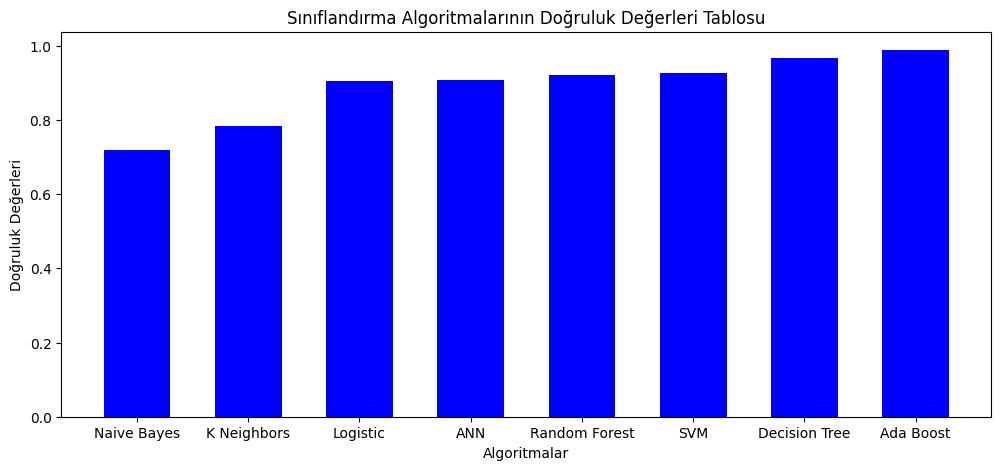

In [37]:
chart_data = {'Naive Bayes':accuracy6,'K Neighbors':accuracy4,'Logistic':accuracy1,
              'ANN':accuracy8,'Random Forest':accuracy3,'SVM':accuracy5,
                'Decision Tree':accuracy2, 'Ada Boost':accuracy7}
algorithms = list(chart_data.keys())
accuracy_score = list(chart_data.values())
fid = plt.figure(figsize=(12,5))
plt.bar(algorithms, accuracy_score, color='blue', width=0.6)
plt.xlabel('Algoritmalar')
plt.ylabel('Doğruluk Değerleri')
plt.title('Sınıflandırma Algoritmalarının Doğruluk Değerleri Tablosu')
plt.show()